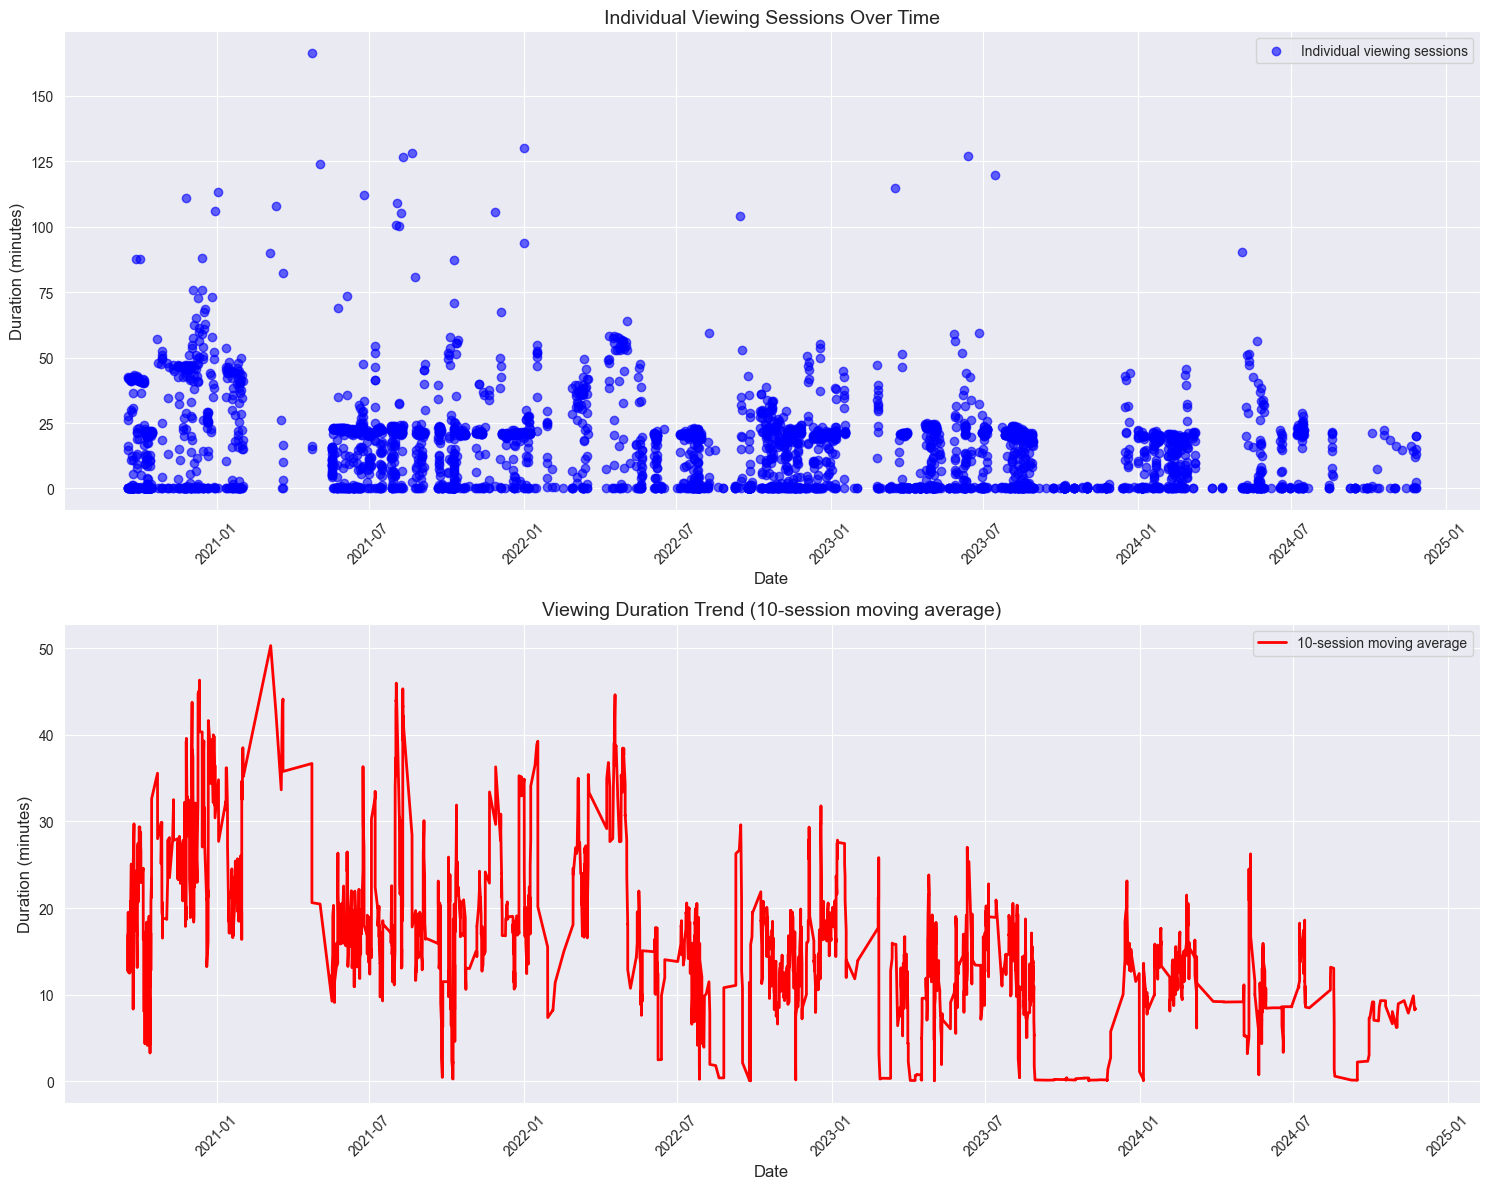


Viewing Statistics:
Total number of views: 4072
Average viewing duration: 15.48 minutes
Longest viewing session: 166.33 minutes
Shortest viewing session: 0.02 minutes


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Read the CSV data with the correct column names
data = pd.read_csv('myData.csv', names=[
    'Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title', 
    'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'
])

# Convert Duration to timedelta
def convert_duration(duration_str):
    try:
        if pd.isna(duration_str):
            return pd.NaT
        parts = duration_str.split(':')
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds = int(parts[2])
        return pd.Timedelta(hours=hours, minutes=minutes, seconds=seconds)
    except:
        return pd.NaT

# Process the data - first convert Start Time, then Duration
data = data.iloc[1:]  # Skip the header row
data['Start Time'] = pd.to_datetime(data['Start Time'])
data['Duration'] = data['Duration'].apply(convert_duration)

# Filter for Mehmet Fatih's entries and remove NaN values
mehmet_data = data[data['Profile Name'] == 'Mehmet Fatih'].copy()
mehmet_data = mehmet_data.dropna(subset=['Duration', 'Start Time'])

# Convert duration to minutes for easier plotting
mehmet_data['Duration_Minutes'] = mehmet_data['Duration'].dt.total_seconds() / 60

# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
sns.set_style("darkgrid")

# Plot 1: Scatter plot of viewing sessions
ax1.scatter(mehmet_data['Start Time'], mehmet_data['Duration_Minutes'], 
           alpha=0.6, color='blue', label='Individual viewing sessions')
ax1.set_title("Individual Viewing Sessions Over Time", fontsize=14)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Duration (minutes)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# Plot 2: Moving average trend
ax2.plot(mehmet_data['Start Time'], mehmet_data['Duration_Minutes'].rolling(10).mean(), 
         color='red', linewidth=2, label='10-session moving average')
ax2.set_title("Viewing Duration Trend (10-session moving average)", fontsize=14)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Duration (minutes)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plots
plt.show()

# Print some statistics
print("\nViewing Statistics:")
print(f"Total number of views: {len(mehmet_data)}")
print(f"Average viewing duration: {mehmet_data['Duration_Minutes'].mean():.2f} minutes")
print(f"Longest viewing session: {mehmet_data['Duration_Minutes'].max():.2f} minutes")
print(f"Shortest viewing session: {mehmet_data['Duration_Minutes'].min():.2f} minutes")